In [1]:
import os
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [2]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-in-HOPS_condensates/paper_figure_plots/condensate_properties"
os.chdir(folder_save)
files_1x = [f for f in os.listdir("N_condensate_per_cell_1x")]
files_2x = [f for f in os.listdir("N_condensate_per_cell_2x")]
color_1x = "#4D5D53"
color_2x = "#536878"

In [3]:
df_1x = pd.concat(
    [pd.read_csv(join("N_condensate_per_cell_1x", f)) for f in files_1x],
    ignore_index=True,
)
N_1x = df_1x["N_condensate_per_cell"].to_numpy(float)
df_2x = pd.concat(
    [pd.read_csv(join("N_condensate_per_cell_2x", f)) for f in files_2x],
    ignore_index=True,
)
N_2x = df_2x["N_condensate_per_cell"].to_numpy(float)
df_toplot = pd.DataFrame(
    {
        "data": np.concatenate([N_1x, N_2x]),
        "label": np.concatenate(
            [
                np.repeat("isotonic", N_1x.shape[0]),
                np.repeat("hypertonic", N_2x.shape[0]),
            ]
        ),
    }
)

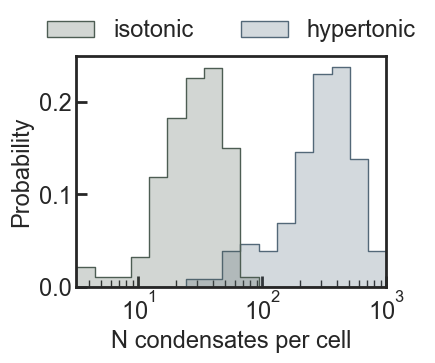

In [16]:
fontsize = 17
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=df_toplot[df_toplot["data"] > 0],
    x="data",
    hue="label",
    stat="probability",
    hue_order=["isotonic", "hypertonic"],
    palette=[color_1x, color_2x],
    bins=17,
    binrange=(0.5, 3),
    common_norm=False,
    log_scale=True,
    element="step",
)
# other settings
sns.move_legend(
    ax,
    "upper center",
    frameon=False,
    title=None,
    fontsize=fontsize,
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("N condensates per cell", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(2)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=8,
    width=2,
)
plt.gca().tick_params(
    axis="x",
    which="minor",
    direction="in",
    bottom=True,
    length=5,
    width=1,
)
plt.xlim(10**0.5, 1000)
plt.savefig(
    "hist_PB_vs_HOPS.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)